https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')



data = pd.read_csv(r"./arima_dataset.csv", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(data.shape)
data.head()

(36,)


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

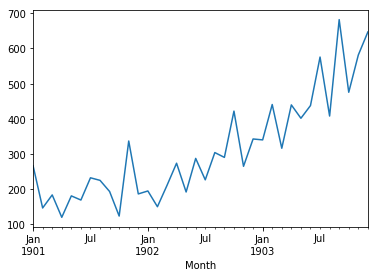

In [3]:
data.plot()
plt.show()

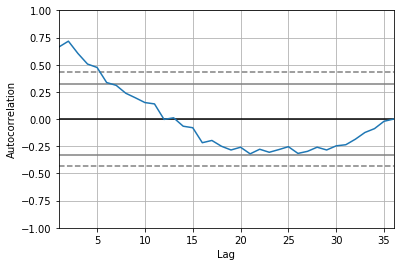

In [4]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
plt.show()

In [7]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
# fit model
model = ARIMA(data, order=(5,1,0)) # p = 5 (AR), d = 1 (integration), q = 0 (MA)
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sun, 12 May 2019   AIC                            406.340
Time:                        22:31:36   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


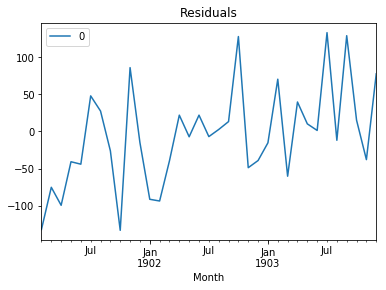

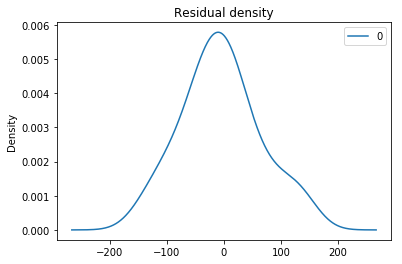

                0
count   35.000000
mean    -5.495230
std     68.132881
min   -133.296594
25%    -42.477970
50%     -7.186724
75%     24.748317
max    133.237970


In [16]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title("Residuals")
plt.show()
residuals.plot(kind='kde')
plt.title("Residual density")
plt.show()
print(residuals.describe())